### Plot Figure 1C

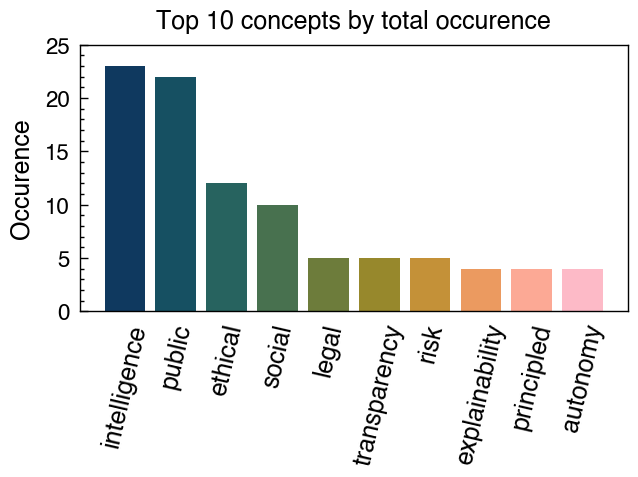

In [5]:
from itertools import chain
from collections import Counter
from collections import OrderedDict

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt


# set size for inline polots
mpl.rcParams['figure.dpi'] = 200
style = './style.py'
plt.style.use(style)

# load data
data = pd.read_excel(
    '../../data/processed/google_scholar_results_processed_concepts_v3.xlsx'
)

# prepare data for plotting
ls = [x for x in data.concepts.tolist() if str(x) != 'nan']
ls = [x.split(',') for x in ls]
lst = [[x.replace(' ','') for x in i] for i in ls]

# extract only top 10 words
d = dict(Counter(chain.from_iterable(lst)))
d = dict(sorted(d.items(), key=lambda item: item[1]))
top = dict(list(d.items())[-10:])
res = OrderedDict(reversed(list(top.items())))

# creat the bar plot
plt.rcParams["font.family"] = "Helvetica"

palette = [
    '#0f395f', '#165062', '#27635f',
    '#48714f', '#6d7c3b', '#97882c', '#c49138',
    '#eb9a60', '#fca995', '#fdbac7'
]

fig = plt.figure()
plt.bar(res.keys(), res.values(), color=palette)

plt.tick_params(
    axis='y',          
    which='major',      
    left=True,     
    right=False)         

plt.tick_params(
    axis='y',          
    which='minor',      
    left=True,     
    right=False,         
    labelright=True) 

plt.tick_params(
    axis='x',          
    which='both',     
    top=False,        
    bottom=False,       
    labelright=False)

plt.title('Top 10 concepts by total occurence', fontsize=9)
plt.xlabel('', fontsize=10)
plt.ylabel('Occurence', fontsize=9)

plt.xticks(rotation=77, fontsize=9)
plt.yticks(fontsize=8)

plt.ylim([0, 25])

plt.tight_layout()
plt.savefig("../../images/fig1-concept-occurence.pdf");